<a href="https://colab.research.google.com/github/rubyvanrooyen/astrokat/blob/master/notebooks/astrokat_uvcoverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Casa installation

Google colab upgraded default python for runtime environment to 3.7 in Feb 2021.   
At 9 April 2021, no wheel exists for casatools and casatasks installation, using CASA suggested  install of pre-release version for 3.7 and 3.8.

In [ ]:
!apt-get install libgfortran3

Check current python version

In [2]:
!python --version

Python 3.7.10


See if a wheel exist for casatools installation

https://casa.nrao.edu/casa_obtaining.shtml and     
https://casa.nrao.edu/casadocs/latest/usingcasa/obtaining-and-installing

If a wheel exists for this version of python, add the code block as per example (for 3.6)   
`!pip install --index-url https://casa-pip.nrao.edu/repository/pypi-casa-release/simple casatools==6.0.0.27`

No wheel currently available for 3.7, notes on work around for >=3.7    
https://www.magclouds.org/casa6-docker/html/install/usage.html    
(https://pypi.org/project/casa6-install/)

In [3]:
!git clone https://github.com/r-xue/casa6-docker.git

Cloning into 'casa6-docker'...
remote: Enumerating objects: 316, done.
remote: Counting objects: 100% (316/316), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 316 (delta 136), reused 299 (delta 123), pack-reused 0
Receiving objects: 100% (316/316), 10.21 MiB | 19.50 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [4]:
!ln -s /content/casa6-docker/casa6_install/casa6_install.py casa6_install.py

In [ ]:
!python casa6_install.py

In [6]:
import casatools

# Import additional libraries

In [7]:
from astropy.coordinates import ICRS, GCRS, SkyCoord
from astropy.coordinates import Longitude, Latitude, EarthLocation
from astropy.coordinates import CartesianRepresentation, SphericalRepresentation
from datetime import datetime, timedelta

import astropy
import astropy.time
import astropy.units as u
import numpy as np

## Do this to get updated IERS B values into astropy

In [8]:
from astropy.utils import iers
from astropy.utils import data
iers_b = iers.IERS_B.open(data.download_file(iers.IERS_B_URL, cache=True))
iers_auto = iers.IERS_Auto.open()

# Define target and time of observation

In [9]:
# J1939-6342
# https://docs.astropy.org/en/stable/coordinates/index.html
target = SkyCoord('19h39m25.0264s', '-63d42m45.624s', frame='icrs')
obs_time = datetime(2013, 6, 21, 21)
# https://docs.astropy.org/en/stable/api/astropy.time.Time.html
obs_time = astropy.time.Time(obs_time, format='datetime', scale='utc')

# MeerKAT

The antenna locations as measured using theodelite can be found in the ARIWS cookbook:    
https://github.com/ska-sa/ARIWS-Cookbook/tree/main/data   
More accurate antenna locations can be found in the MeerKAT observation data itself.

Antenna positions and pointing models are part of the MeerKAT meta-data accompanying all observations.   
See MeerKAT Cookbook for information:   
https://github.com/ska-sa/MeerKAT-Cookbook

Specifically the notebook:    
https://github.com/ska-sa/MeerKAT-Cookbook/blob/master/katdal/Explaining%20MeerKAT%20array%20information.ipynb

In [10]:
"""General Earth position for the Telescope"""
# reference position is given in geodetic coordinates (lat, lon, height)
# convert to geocentric coordinates (x, y, z)
telescope = EarthLocation.from_geodetic(Longitude('21:26:38.0', u.degree, wrap_angle=180. * u.degree, copy=False),
                                        Latitude('-30:42:39.8', u.degree, copy=False),
                                        height=u.Quantity(1086.6, u.m, copy=False))
print(f'Telescope MKT {telescope}')
[ref_x, ref_y, ref_z] = telescope.geocentric

# MeerKAT antenna positions (E, N, U) offset from telescope reference location
antpos = np.array([[-8.264, -207.29, 8.5965],  # m000
                   [1.1205, -171.762, 8.4705],  # m001
                   [-32.113, -224.236, 8.6445],  # m002
                   [-66.518, -202.276, 8.285],  # m003
                   [-123.624, -252.946, 8.513],  # m004
                   [-102.088, -283.12, 8.875],  # m005
                   [-18.2315, -295.428, 9.188],  # m006
                   [-89.592, -402.732, 9.7685],  # m007
                   [-93.527, -535.026, 10.4445],  # m008
                   [32.3565, -371.0555, 10.14],  # m009
                   [88.095, -511.872, 11.1855],  # m010
                   [84.0115, -352.078, 10.151],  # m011
                   [140.019, -368.267, 10.4485],  # m012
                   [236.7915, -393.46, 11.124],  # m013
                   [280.669, -285.792, 10.5465],  # m014
                   [210.6435, -219.1415, 9.738],  # m015
                   [288.159, -185.873, 9.795],  # m016
                   [199.6235, -112.263, 8.9545],  # m017
                   [105.7265, -245.8695, 9.529],  # m018
                   [170.7865, -285.223, 10.0705],  # m019
                   [97.016, -299.638, 9.8765],  # m020
                   [-295.9655, -327.241, 8.117],  # m021
                   [-373.0015, 0.544, 5.649],  # m022
                   [-322.306, -142.1845, 6.8245],  # m023
                   [-351.0455, 150.088, 4.845],  # m024
                   [-181.9775, 225.617, 5.068],  # m025
                   [-99.0035, 17.045, 6.811],  # m026
                   [40.4745, -23.112, 7.694],  # m027
                   [-51.179, -87.17, 7.6355],  # m028
                   [-88.7615, -124.111, 7.6995],  # m029
                   [171.2805, 113.949, 7.278],  # m030
                   [246.5665, 93.756, 7.4685],  # m031
                   [461.2745, 175.505, 7.367],  # m032
                   [580.678, 863.9585, 3.5995],  # m033
                   [357.8105, -28.308, 8.972],  # m034
                   [386.152, -180.8935, 10.2895],  # m035
                   [388.2565, -290.759, 10.812],  # m036
                   [380.2855, -459.3085, 12.1715],  # m037
                   [213.308, -569.08, 11.946],  # m038
                   [253.7475, -592.1465, 12.441],  # m039
                   [-26.858, -712.219, 11.8325],  # m040
                   [-287.545, -661.678, 9.9485],  # m041
                   [-361.7135, -460.318, 8.497],  # m042
                   [-629.8525, -128.326, 5.264],  # m043
                   [-896.164, 600.4965, -0.6395],  # m044
                   [-1832.8595, 266.75, 0.1075],  # m045
                   [-1467.341, 1751.923, -7.0775],  # m046
                   [-578.2955, -517.2965, 7.6145],  # m047
                   [-2805.653, 2686.863, -9.7545],  # m048
                   [-3605.9565, 436.462, 2.696],  # m049
                   [-2052.336, -843.7145, 5.3375],  # m050
                   [-850.255, -769.359, 7.6135],  # m051
                   [-593.192, -1148.652, 10.55],  # m052
                   [9.3645, -1304.462, 15.032],  # m053
                   [871.9795, -499.812, 13.3635],  # m054
                   [1201.7795, 96.492, 10.0225],  # m055
                   [1598.4025, 466.6675, 6.99],  # m056
                   [294.6445, 3259.9145, -10.6365],  # m057
                   [2805.764, 2686.873, -3.6595],  # m058
                   [3686.4265, 758.895, 11.8215],  # m059
                   [3419.6825, -1840.478, 23.6965],  # m060
                   [-16.4085, -2323.779, 21.304],  # m061
                   [-1440.6315, -2503.773, 21.6825],  # m062
                   [-3419.5845, -1840.48, 16.3825],  # m063
                   ]) * u.m

L = Latitude('-30:42:39.8', u.degree, copy=False)
L_sin = np.sin(L.rad)
L_cos = np.cos(L.rad)
x = -L_sin * antpos[:,1] + L_cos * antpos[:,2]
y = antpos[:,0]
z = L_cos * antpos[:,1] + L_sin * antpos[:,2]

# Format antenna positions
antpos=np.array([ref_x+x, ref_y+y, ref_z+z]).T * u.m

Telescope MKT (5109360.13332123, 2006852.58604291, -3238948.12747888) m


# UV coverage

In [11]:
# The necessary interfaces:
me = casatools.measures()
qa = casatools.quanta()
qq = qa.quantity

In [12]:
telescope = 'MeerKAT'
print(me.observatory(telescope))

{'m0': {'unit': 'rad', 'value': 0.37426665946841203}, 'm1': {'unit': 'rad', 'value': -0.5360464638235224}, 'm2': {'unit': 'm', 'value': 1050.0}, 'refer': 'WGS84', 'type': 'position'}


In [13]:
# Init CASA frame info:
me.doframe(me.observatory(telescope))
me.doframe(me.epoch('UTC',qq(obs_time.mjd,'d')))
me.doframe(me.direction('J2000',
                        qq(target.ra.to(u.rad).value, 'rad'),
                        qq(target.dec.to(u.rad).value, 'rad')))

True

In [14]:
# Format antenna positions for CASA
ap_T_casa = me.position('ITRF',
                        qq(antpos[:,0].to(u.m).value,'m'),
                        qq(antpos[:,1].to(u.m).value,'m'),
                        qq(antpos[:,2].to(u.m).value,'m'))
# Converts from ITRF to ICRF ("J2000")
ap_C_casa = me.asbaseline(ap_T_casa)

# Rotate into UVW frame
ap_UVW_casa = me.touvw(ap_C_casa)[0]

In [15]:
def casa_to_astropy(c):
    """Convert CASA spherical coords to astropy CartesianRepresentation"""
    sph = SphericalRepresentation(lon=c['m0']['value']*u.Unit(c['m0']['unit']),
                                  lat=c['m1']['value']*u.Unit(c['m1']['unit']),
                                  distance=c['m2']['value']*u.Unit(c['m2']['unit']))
    return sph.represent_as(CartesianRepresentation)

# me.expand would compute all pairs of baselines but here we convert
# to astropy CartesianRepresentation, and only do baselines to the
# first antenna for easier comparison
casa_UVW_bl = casa_to_astropy(ap_UVW_casa)


In [16]:
def get_uvwcoverage(casa_UVW_bl, casa_UVW_coverage):
    nants = len(casa_UVW_bl)
    for idx0 in range(nants):
        ap_UVW_bl = casa_UVW_bl - casa_UVW_bl[idx0]
        # add results to coverage map
        bl_idx_start = idx0*ap_UVW_bl.size
        bl_idx_end = bl_idx_start+nants
        casa_UVW_coverage[bl_idx_start:bl_idx_end,:] = ap_UVW_bl.xyz.T

[nants, _] = np.shape(antpos)
nbls = nants*nants
casa_UVW_coverage = np.zeros([nbls, 3])  # nbl x uvw x nts
get_uvwcoverage(casa_UVW_bl, casa_UVW_coverage)

# Show results

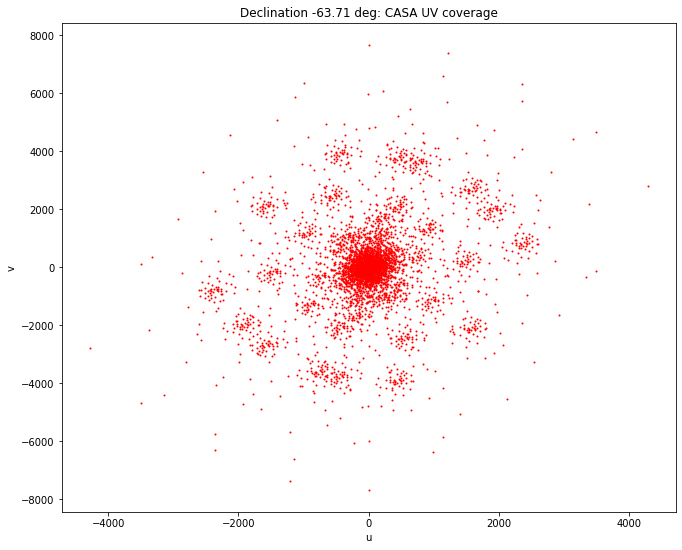

In [17]:
import matplotlib.pylab as plt
def plot_uv(bl_uvw, fig=None, ax=None, clr='b'):  # all ts per bl
    """UV coverage graph"""
    if fig is None:
        fig, ax = plt.subplots(nrows=1, ncols=1,
                               figsize=(20, 13),  # W x H
                               facecolor='white')
    ax.plot(bl_uvw[:, 0], bl_uvw[:, 1],
            color=clr,
            marker='.', markersize=2,
            linestyle='none')
    return fig, ax

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 9), facecolor='white')
ax.set_title(f'Declination {target.dec.degree:.2f} deg: CASA UV coverage')
plot_uv(casa_UVW_coverage, fig=fig, ax=ax, clr='r')
ax.set_xlabel('u')
ax.set_ylabel('v')
plt.show()